In [1]:
import pandas as pd
import numpy as np
from datetime import time
import math

# 시각화 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
%matplotlib inline

In [2]:
df02 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/2월.csv',header=0,encoding='cp949')
df03 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/3월.csv',header=0,encoding='cp949')
df04 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/4월.csv',header=0,encoding='cp949')
df05 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/5월.csv',header=0,encoding='cp949')
df06 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/6월.csv',header=0,encoding='cp949')
df07 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/7월.csv',header=0,encoding='cp949')

C:\Users\wnrrh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
columns = ["사용년월", "노선번호", "노선명", "표준버스정류장ID", "버스정류장ARS번호", "정류장명", "0시승차", "0시하차", "1시승차", "1시하차", "2시승차", "2시하차", 
"3시승차", "3시하차", "4시승차", "4시하차", "5시승차", "5시하차", "6시승차", "6시하차", "7시승차", "7시하차", "8시승차", "8시하차", 
"9시승차", "9시하차", "10시승차", "10시하차", "11시승차", "11시하차", "12시승차", "12시하차", "13시승차", "13시하차", "14시승차", "14시하차", 
"15시승차", "15시하차", "16시승차", "16시하차", "17시승차", "17시하차", "18시승차", "18시하차", "19시승차", "19시하차", "20시승차", "20시하차", 
"21시승차", "21시하차", "22시승차", "22시하차", "23시승차", "23시하차", "등록일자"]

In [6]:
df02.columns = columns
df03.columns = columns
df04.columns = columns
df05.columns = columns
df06.columns = columns
df07.columns = columns
df = pd.concat([df02, df03, df04, df05, df06, df07])

In [7]:

# 필요없는 칼럼 제거
df.drop(["사용년월", "노선번호", "노선명", "표준버스정류장ID", "버스정류장ARS번호", "0시하차", "1시하차", "2시하차", "3시하차", "4시하차", "5시하차", "6시하차", "7시하차", "8시하차",
"9시하차", "10시하차", "11시하차", "12시하차", "13시하차", "14시하차", "15시하차", "16시하차", "17시하차", "18시하차", "19시하차", "20시하차", 
"21시하차", "22시하차", "23시하차", "등록일자"], axis = 1, inplace=True)

In [8]:
# 합계 칼럼 추가
df = df.assign(합계 = lambda x: (x["0시승차"] + x["1시승차"] + x["2시승차"] + x["3시승차"] + x["4시승차"] + x["5시승차"] + 
x["6시승차"] + x["7시승차"] + x["8시승차"] + x["9시승차"] + x["10시승차"] + x["11시승차"] + x["12시승차"] + x["13시승차"] + x["14시승차"] + 
x["15시승차"] + x["16시승차"] + x["17시승차"] + x["18시승차"] + x["19시승차"] + x["20시승차"] + x["21시승차"] + x["22시승차"] + x["23시승차"]))

In [9]:
# 정류장명을 기준으로 병합
df = df.sort_values(by = "합계", ascending=False)
df = df.groupby(["정류장명"]).sum()

In [10]:

# 6개월 간 승차인원 상위 10개 정류장 선정
df = df.sort_values(by = "합계", ascending=False)
df_top10 = df.head(10)

In [14]:
# 상위 10개 정류장의 정류소 수 csv데이터 불러오기
df_top10_count = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/top10정류장수.csv', header = 0, encoding = 'cp949', low_memory=False )
# 유동인구 데이터 불러오기
people = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/유동인구.csv', header = 0, encoding = 'cp949', low_memory=False )
people = people.groupby(["자치구"]).sum()
people

,월,시간,총생활인구수,유동인구
자치구,,,,
강남구,648,1656,3448600370,120869717
강동구,648,1656,2183709475,25297963
강북구,648,1656,1280570909,17379251
강서구,648,1656,2336625106,14247991
관악구,648,1656,2055054280,33469287
광진구,648,1656,1549532595,12605995
구로구,648,1656,1660157648,8606838
금천구,648,1656,946972423,15209732
노원구,648,1656,2219966950,24499449


In [15]:

# 상위 10개 정류장 합계 데이터와 10개 정류장의 정류소 수 데이터 병합
final = pd.merge(df_top10, df_top10_count, how="outer", on="정류장명")

In [16]:

# 정류장이 속한 자치구
conditionlist = [(final["정류장명"] == "구로디지털단지역환승센터"), (final["정류장명"] == "지하철2호선강남역"), (final["정류장명"] == "고속터미널"), 
(final["정류장명"] == "쌍문역"), (final["정류장명"] == "수유역.강북구청"), (final["정류장명"] == "미아사거리역"), (final["정류장명"] == "구로디지털단지역"), 
(final["정류장명"] == "노량진역"), (final["정류장명"] == "홍대입구역"), (final["정류장명"] == "신도림역")]
choicelist = ["구로구", "강남구", "서초구", "도봉구", "강북구", "강북구", "구로구", "동작구", "마포구", "구로구"]
final["자치구"] = np.select(conditionlist, choicelist, default="Not Specfied")

In [17]:
# 자치구 별 유동인구 칼럼 추가
jachigu = ["강남구", "강동구", "강북구", "강서구","관악구", "광진구", "구로구", "금천구", "노원구", "도봉구", "동대문구", "동작구", "마포구", "서대문구", 
"서초구", "성동구", "성북구", "송파구", "양천구", "영등포구", "용산구", "은평구", "종로구", "중구", "중랑구"]
number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
final["유동인구"] = ""
for i in range(10):
    for j in range(25):
        if final.iloc[i,28] == jachigu[j]:
            final.iloc[i,29] = people.iloc[jachigu.index(jachigu[j]),3]
# 유동인구 파생변수
final["유동인구분류"] = final["유동인구"].apply(lambda x: 1 if(x>=30477318) else 0)

In [18]:
# 밀집도
final = final.assign(밀집도 = lambda x: x["합계"] / (x["정류장수"] * x["기본규격"])/100000)
final = final.sort_values(by = "밀집도", ascending=False)
final

,정류장명,0시승차,1시승차,2시승차,3시승차,4시승차,5시승차,6시승차,7시승차,8시승차,...,21시승차,22시승차,23시승차,합계,정류장수,기본규격,자치구,유동인구,유동인구분류,밀집도
6,구로디지털단지역환승센터,2183,7,0,0,1,20984,31476,85119,147099,...,168884,178281,75435,2142044,2,18,구로구,8606838,0,0.595012
7,지하철2호선강남역,21507,5166,2270,2126,3717,10737,31859,85123,129671,...,168102,173995,49466,2130673,2,18,강남구,120869717,1,0.591854
1,고속터미널,21435,2180,0,0,3943,29832,41842,93278,127497,...,160705,159226,64326,2656679,3,18,서초구,65404806,1,0.491978
5,쌍문역,10306,1699,863,1315,22708,18043,31202,62214,92307,...,162922,153525,77447,2253876,3,18,도봉구,14802804,0,0.417384
9,수유역.강북구청,16742,4486,532,464,3078,9303,32721,61780,111815,...,144020,138070,67032,2078915,4,18,강북구,17379251,0,0.288738
0,미아사거리역,20251,4623,1699,1552,28142,62613,69301,115795,172032,...,172467,162923,69000,3051233,6,18,강북구,17379251,0,0.282522
4,구로디지털단지역,9814,998,1675,767,11780,28807,45376,88688,153768,...,162416,165099,58656,2271604,6,18,구로구,8606838,0,0.210334
8,노량진역,9339,653,400,481,3674,13611,25399,54786,85095,...,174423,179518,67610,2090038,6,18,동작구,20464567,0,0.193522
2,홍대입구역,17895,2481,1574,1067,1415,10834,30190,73001,132778,...,203721,211415,70471,2406614,7,18,마포구,22652274,0,0.191001
3,신도림역,14865,2415,1469,1343,13742,20501,33885,84690,160104,...,170736,179971,75632,2284630,7,18,구로구,8606838,0,0.181320


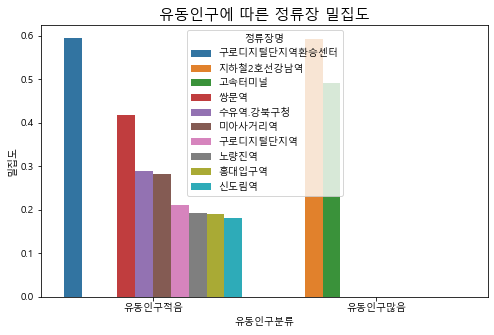

In [19]:

# 유동인구
plt.figure(figsize=(8,5))
sns.barplot(data=final, x='유동인구분류',y='밀집도', hue='정류장명')
plt.title("유동인구에 따른 정류장 밀집도", fontdict={'fontsize':15})
plt.xticks([0,1],['유동인구적음','유동인구많음'])
plt.show()

C:\Users\wnrrh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '밀집도 분포')

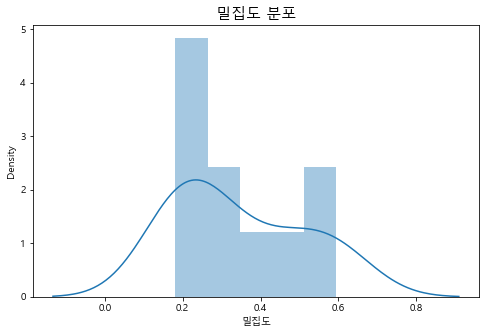

In [20]:

# 밀집도 분포
plt.figure(figsize=(8,5))
sns.distplot(final['밀집도'], bins = 5)
plt.title("밀집도 분포",fontdict={'fontsize':15})

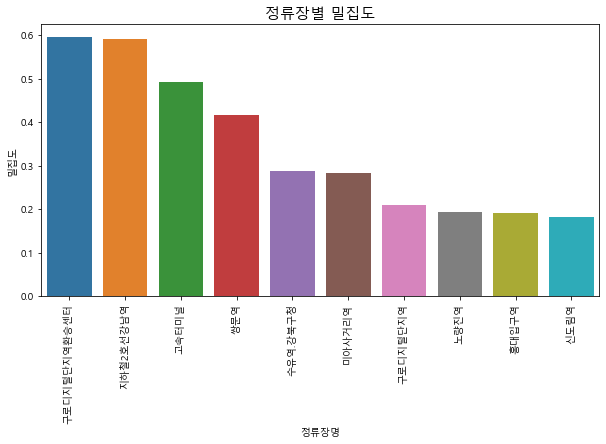

In [21]:

plt.figure(figsize=(10,5))
df=final.sort_values(by='밀집도', ascending=False)
sns.barplot(data=df, x='정류장명',y='밀집도')
plt.title("정류장별 밀집도", fontdict={'fontsize':15})
plt.xticks(rotation=90)
plt.show()

In [29]:
## 파생변수 만들기
# 시간별 파생변수 생성을 위해 새 엑셀 데이터 작성
final_1 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/final.csv', header = 0, encoding = 'cp949', low_memory=False)
# 정류장별 정류소 수 
conditionlist = [(final_1["정류장명"] == "구로디지털단지역환승센터"), (final_1["정류장명"] == "지하철2호선강남역"), (final_1["정류장명"] == "고속터미널"), 
(final_1["정류장명"] == "쌍문역"), (final_1["정류장명"] == "수유역.강북구청"), (final_1["정류장명"] == "미아사거리역"), (final_1["정류장명"] == "구로디지털단지역"), 
(final_1["정류장명"] == "노량진역"), (final_1["정류장명"] == "홍대입구역"), (final_1["정류장명"] == "신도림역")]
choicelist = [2, 2, 3, 3, 4, 6, 6, 6, 7, 7]
final_1["정류소수"] = np.select(conditionlist, choicelist, default="Not Specfied")
# 정류장이 속한 자치구
conditionlist = [(final_1["정류장명"] == "구로디지털단지역환승센터"), (final_1["정류장명"] == "지하철2호선강남역"), (final_1["정류장명"] == "고속터미널"), 
(final_1["정류장명"] == "쌍문역"), (final_1["정류장명"] == "수유역.강북구청"), (final_1["정류장명"] == "미아사거리역"), (final_1["정류장명"] == "구로디지털단지역"), 
(final_1["정류장명"] == "노량진역"), (final_1["정류장명"] == "홍대입구역"), (final_1["정류장명"] == "신도림역")]
choicelist = ["구로구", "강남구", "서초구", "도봉구", "강북구", "강북구", "구로구", "동작구", "마포구", "구로구"]
final_1["자치구"] = np.select(conditionlist, choicelist, default="Not Specfied")
# 기본규격
final_1["기본규격"] = 18
# 오전/오후 시간대 여부
final_1["오전/오후"] = final_1["시간"].apply(lambda x: 1 if(12<=x<=23) else 0)
# 출퇴근 시간대 여부
final_1["출퇴근"] = final_1["시간"].apply(lambda x: 1 if(6<=x<=8)|(17<=x<=19) else 0)
# 막차 시간대 여부
final_1["막차"] = final_1["시간"].apply(lambda x: 1 if(x >= 22)|(x==0) else 0)
final_1

,정류장명,시간,승차인원,정류소수,자치구,기본규격,오전/오후,출퇴근,막차
0,미아사거리역,0,20251,6,강북구,18,0,0,1
1,미아사거리역,1,4623,6,강북구,18,0,0,0
2,미아사거리역,2,1699,6,강북구,18,0,0,0
3,미아사거리역,3,1552,6,강북구,18,0,0,0
4,미아사거리역,4,28142,6,강북구,18,0,0,0
...,...,...,...,...,...,...,...,...,...
235,수유역.강북구청,19,194429,4,강북구,18,1,1,0
236,수유역.강북구청,20,140450,4,강북구,18,1,0,0
237,수유역.강북구청,21,144020,4,강북구,18,1,0,0
238,수유역.강북구청,22,138070,4,강북구,18,1,0,1


In [1]:

# 유동인구 데이터
people_1 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/유동인구.csv', header = 0, encoding = 'cp949', low_memory=False)
people_1.drop(["월", "총생활인구수"], axis = 1, inplace=True)
people_1 = people_1.groupby(["시간", "자치구"]).sum()
# 자치구 시간대별 유동인구
final_1["유동인구"] = ""
jachigu = ["종로구", "중구", "용산구", "성동구","광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", 
"강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
time = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
for i in range(240):
  for j in range(24):
      for k in range(25):
        if final_1.iloc[i,1] == time[j] and final_1.iloc[i,4] == jachigu[k]:
            final_1.iloc[i,9] = people_1.loc[time[j], jachigu[k]]
# 유동인구 파생변수
final_1["유동인구분류"] = final_1["유동인구"].apply(lambda x: 1 if(x>=1269888) else 0)

NameError: name 'pd' is not defined

In [32]:

# 밀집도
final_1["밀집도"] = final_1["승차인원"]/(final_1["기본규격"]/math.pi)

C:\Users\wnrrh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '밀집도 분포')

C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


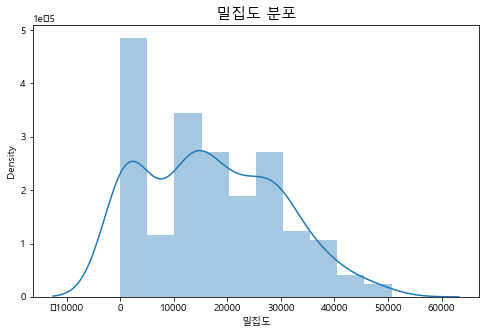

In [33]:
plt.figure(figsize=(8,5))
sns.distplot(final_1['밀집도'], bins = 10)
plt.title("밀집도 분포",fontdict={'fontsize':15})

In [34]:
final_1["밀집도"].describe()

count      240.000000
mean     16992.457239
std      12506.845072
min          0.000000
25%       5253.528315
50%      15684.575856
75%      27072.587426
max      50670.224311
Name: 밀집도, dtype: float64

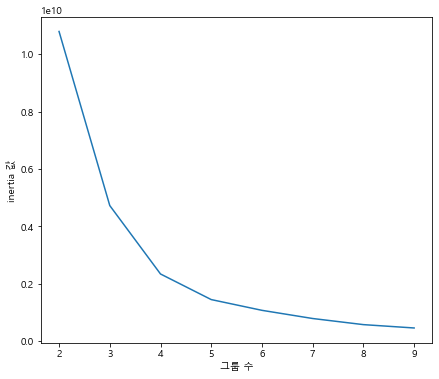

In [35]:
## k-means clustering
from sklearn.cluster import KMeans

X = final_1[["밀집도"]]
X_train = pd.get_dummies(X)
model = KMeans(n_clusters=2, random_state=0)
model.fit(X)
y_pred = model.labels_
final_1['cluster_label'] = y_pred

inertia_list = []
k_list = range(2,10)
for k in k_list:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia_list.append(model.inertia_)
plt.figure(figsize=(7,6))
plt.plot(k_list, inertia_list)
plt.xlabel("그룹 수")
plt.ylabel("inertia 값")
plt.show()

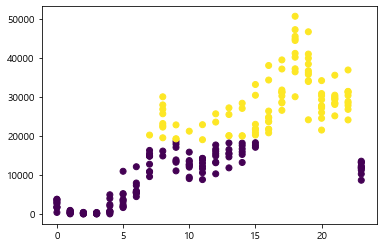

In [36]:
plt.scatter(x = final_1["시간"], y = final_1["밀집도"], c=y_pred)

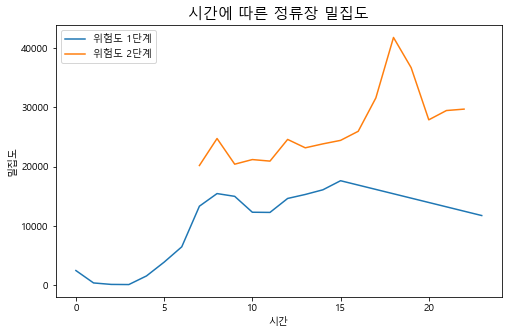

In [37]:
plt.figure(figsize=(8,5))
sns.lineplot(data=final_1[final_1['cluster_label']==0], x='시간', y='밀집도', ci=None, label='위험도 1단계')
sns.lineplot(data=final_1[final_1['cluster_label']==1], x='시간', y='밀집도', ci=None, label='위험도 2단계')
# sns.lineplot(data=final_1[final_1['cluster_label']==2], x='시간', y='밀집도', ci=None, label='위험도 3단계')
# sns.lineplot(data=final_1[final_1['cluster_label']==3], x='시간', y='밀집도', ci=None, label='위험도 4단계')
plt.title("시간에 따른 정류장 밀집도", fontdict={'fontsize':15})
plt.legend()
plt.show()

In [38]:
final_1['위험도'] = final_1['cluster_label'].apply(lambda x: 1 if x==0 else (2 if x== 1 else(3 if x== 2 else 4)))

In [39]:
# 과거값 & 미래값 변수 생성
final_1 = final_1[["정류장명", "시간", "정류소수", "자치구", "기본규격", "오전/오후", "출퇴근", "막차", "밀집도", "승차인원", "유동인구", "위험도", "유동인구분류", 
"cluster_label"]]
final_1["1시간 전 밀집도"] = ""
final_1["1시간 전 승차인원"] = ""
final_1["1시간 전 유동인구"] = ""
final_1["1시간 전 위험도"] = ""
for i in range(10):
    for j in range(24):
        for k in range(4):
            if j != 0:
                final_1.iloc[24*i+j, 14+k] = final_1.iloc[24*i+j-1, 8+k]
            else:
                final_1.iloc[24*i+j, 14+k] = final_1.iloc[24*i+j+23, 8+k]
final_1["1시간 후 위험도"] = ""
for i in range(10):
    for j in range(24):
            if j != 23:
                final_1.iloc[24*i+j, 18] = final_1.iloc[24*i+j+1, 11]
            else:
                final_1.iloc[24*i+j, 18] = final_1.iloc[24*i+j-23, 11]

<ipython-input-39-d6217d80b3a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1["1시간 전 밀집도"] = ""
<ipython-input-39-d6217d80b3a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1["1시간 전 승차인원"] = ""
<ipython-input-39-d6217d80b3a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

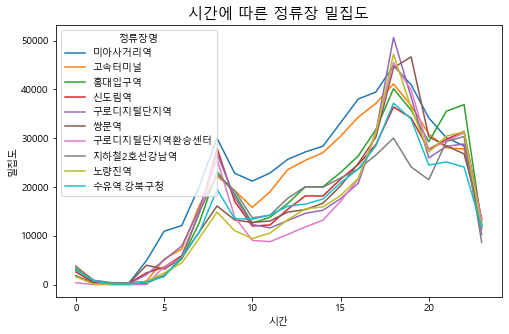

In [40]:
# EDA 시각화
# 시간에 따른 정류장 밀집도
plt.figure(figsize=(8,5))
sns.lineplot(data=final_1, x='시간', y='밀집도', hue = '정류장명', ci=None)
plt.title("시간에 따른 정류장 밀집도", fontdict={'fontsize':15})
plt.show()

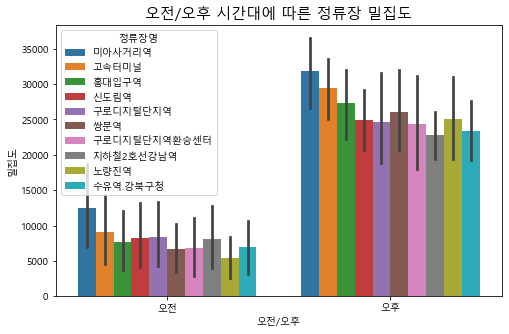

In [41]:
# 오전/오후시간대 여부
plt.figure(figsize=(8,5))
sns.barplot(data=final_1, x='오전/오후',y='밀집도', hue='정류장명')
plt.title("오전/오후 시간대에 따른 정류장 밀집도", fontdict={'fontsize':15})
plt.xticks([0,1],['오전','오후'])
plt.show()

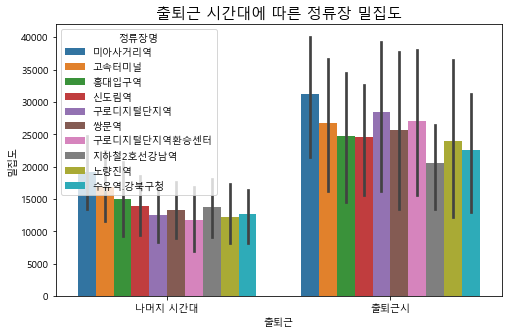

In [42]:
# 출퇴근 시간대 여부
plt.figure(figsize=(8,5))
sns.barplot(data=final_1, x='출퇴근',y='밀집도', hue='정류장명')
plt.title("출퇴근 시간대에 따른 정류장 밀집도", fontdict={'fontsize':15})
plt.xticks([0,1],['나머지 시간대','출퇴근시'])
plt.show()

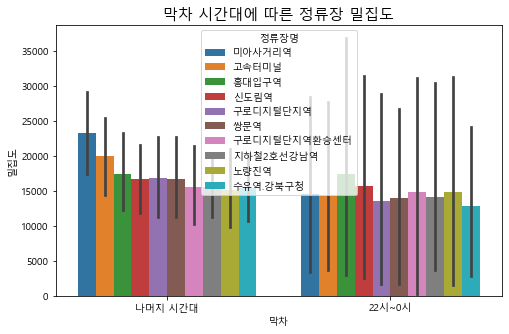

In [43]:
# 막차 시간대 여부
plt.figure(figsize=(8,5))
sns.barplot(data=final_1, x='막차',y='밀집도', hue='정류장명')
plt.title("막차 시간대에 따른 정류장 밀집도", fontdict={'fontsize':15})
plt.xticks([0,1],['나머지 시간대','22시~0시'])
plt.show()

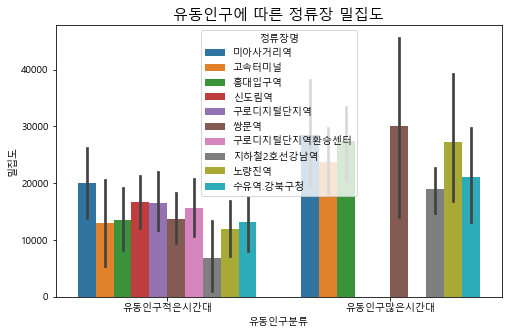

In [44]:
#  유동인구에 따라
plt.figure(figsize=(8,5))
sns.barplot(data=final_1, x='유동인구분류',y='밀집도', hue='정류장명')
plt.title("유동인구에 따른 정류장 밀집도", fontdict={'fontsize':15})
plt.xticks([0,1],['유동인구적은시간대','유동인구많은시간대'])
plt.show()

In [45]:
df1 = final_1.drop(["시간", "밀집도", "위험도", "cluster_label","기본규격"], axis=1)
df1.dtypes

df1["정류소수"] = df1["정류소수"].astype("float")
df1["오전/오후"] = df1["오전/오후"].astype("float")
df1["출퇴근"] = df1["출퇴근"].astype("float")
df1["막차"] = df1["막차"].astype("float")
df1["승차인원"] = df1["승차인원"].astype("float")
df1["유동인구"] = df1["유동인구"].astype("float")
df1["유동인구분류"] = df1["유동인구분류"].astype("float")
df1["1시간 전 밀집도"] = df1["1시간 전 밀집도"].astype("float")
df1["1시간 전 승차인원"] = df1["1시간 전 승차인원"].astype("float")
df1["1시간 전 유동인구"] = df1["1시간 전 유동인구"].astype("float")
df1["1시간 전 위험도"] = df1["1시간 전 위험도"].astype("float")
df1["1시간 후 위험도"] = df1["1시간 후 위험도"].astype("float")

In [46]:
df1

,정류장명,정류소수,자치구,오전/오후,출퇴근,막차,승차인원,유동인구,유동인구분류,1시간 전 밀집도,1시간 전 승차인원,1시간 전 유동인구,1시간 전 위험도,1시간 후 위험도
0,미아사거리역,6.0,강북구,0.0,0.0,1.0,20251.0,173752.0,0.0,12042.771839,69000.0,1296987.0,1.0,1.0
1,미아사거리역,6.0,강북구,0.0,0.0,0.0,4623.0,63001.0,0.0,3534.466268,20251.0,173752.0,1.0,1.0
2,미아사거리역,6.0,강북구,0.0,0.0,0.0,1699.0,52125.0,0.0,806.865713,4623.0,63001.0,1.0,1.0
3,미아사거리역,6.0,강북구,0.0,0.0,0.0,1552.0,30591.0,0.0,296.531440,1699.0,52125.0,1.0,1.0
4,미아사거리역,6.0,강북구,0.0,0.0,0.0,28142.0,237192.0,0.0,270.875100,1552.0,30591.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,수유역.강북구청,4.0,강북구,1.0,1.0,0.0,194429.0,1615283.0,1.0,37202.740204,213156.0,1409025.0,2.0,2.0
236,수유역.강북구청,4.0,강북구,1.0,0.0,0.0,140450.0,935126.0,0.0,33934.262114,194429.0,1615283.0,2.0,2.0
237,수유역.강북구청,4.0,강북구,1.0,0.0,0.0,144020.0,872723.0,0.0,24513.149344,140450.0,935126.0,2.0,2.0
238,수유역.강북구청,4.0,강북구,1.0,0.0,1.0,138070.0,925409.0,0.0,25136.231887,144020.0,872723.0,2.0,1.0


테스트 정확도: 0.938


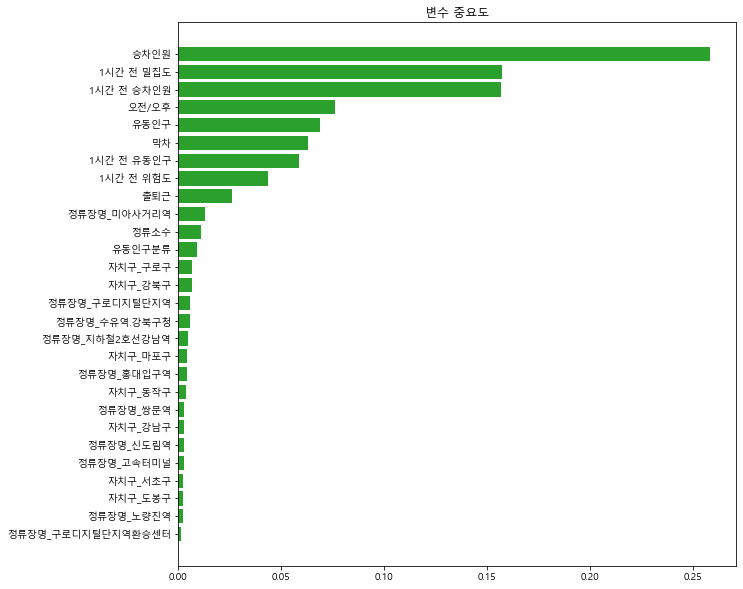

In [47]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
# 사용할 입력 변수
features = df1.columns
X = df1[features].drop("1시간 후 위험도", axis=1)
y = df1["1시간 후 위험도"]

# 연속형 변수 처리
numeric_features = X.select_dtypes("float").columns.to_list()
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# 범주형 변수 처리
# categorical_features = X.select_dtypes("object").columns.to_list()
# categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
        # ('cat', categorical_transformer, categorical_features)])
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=240)
y_train = y_train.astype('float')


pipe_rf = make_pipeline(preprocessor,RandomForestClassifier(random_state=240)) 
pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)
print('테스트 정확도: %.3f' % accuracy_score(y_test, y_pred))

rf = RandomForestClassifier(random_state=240)
rf.fit(pd.get_dummies(X_train), y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('변수 중요도')
plt.barh(range(len(indices)), importances[indices], color='tab:green', align='center')
plt.yticks(range(len(indices)), [pd.get_dummies(X_train).columns[i] for i in indices])
plt.show()

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, precision_score, f1_score, recall_score, accuracy_score, average_precision_score
from sklearn.metrics import precision_score, recall_score, classification_report

pipe_svm = make_pipeline(preprocessor,SVC())

param_grid = [{'svc__C': [1,5,10,50,100,500],
               'svc__gamma': [0.01,0.1,1],
               'svc__kernel': ['rbf']}]

scorers = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           'f1_weighted': make_scorer(f1_score, average = 'weighted')}

gs_svm = GridSearchCV(estimator=pipe_svm,
                  param_grid=param_grid,
                  scoring=scorers,
                  refit='f1_weighted',
                  cv=5,
                  n_jobs=-1)

gs_svm.fit(X_train, y_train)

print("최적의 매개변수 조합: %s" %gs_svm.best_params_)
print("CV 정확도: %.3f" %gs_svm.best_score_)

clf_svm = gs_svm.best_estimator_
print("테스트 정확도: %.3f" % clf_svm.score(X_test, y_test))

최적의 매개변수 조합: {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
CV 정확도: 0.884
테스트 정확도: 0.875


In [49]:
print(classification_report(y_test, clf_svm.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        28
         2.0       0.85      0.85      0.85        20

    accuracy                           0.88        48
   macro avg       0.87      0.87      0.87        48
weighted avg       0.88      0.88      0.88        48

